Você é um cientista de dados contratado por uma empresa imobiliária para desenvolver um modelo que ajude a prever o preço de casas com base em algumas características.

A empresa possui um grande banco de dados com informações sobre diversas propriedades, como tamanho do lote, número de quartos, idade da casa, entre outras. Eles acreditam que, com um modelo preditivo eficiente, poderão ajustar melhor seus preços e oferecer melhores recomendações aos seus clientes.

Nesse cenário, você será guiado na construção de um modelo de regressão linear simples, mas eficaz, para prever o preço das casas usando Python e a biblioteca Scikit-learn.

Você vai trabalhar com um dataset que contém informações de vendas de casas em uma cidade dos EUA. Você precisa criar um dataset com as seguintes colunas:

- Área do lote (em pés quadrados);

- Ano de construção da casa;

- Área do primeiro andar (em pés quadrados);

- Área do segundo andar (em pés quadrados);

- Número de banheiros completos;

- Número de quartos acima do solo;

- Número total de quartos acima do solo (excluindo banheiros);

- Preço de venda da casa (em reais).

Seu objetivo é construir um modelo que use as outras variáveis do dataset para prever o preço de venda da casa.

Lembre-se: esta oficina deverá ser realizada no Google Colab, uma ferramenta on-line gratuita que facilita o uso de Python sem a necessidade de instalações locais.

Bons estudos!

In [15]:
# Passo 1: Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [19]:
# Passo 2: Gerando o Dataset
# Gerando dados fictícios com base no problema
np.random.seed(0)  # Para reproduzir os resultados

# Gerando as colunas do dataset (intervalo1, intervalo2, quantidade)
area_lote = np.random.uniform(500, 2000, 200)  # Área do lote (em pés quadrados)
ano_construcao = np.random.randint(1900, 2022, 200)  # Ano de construção da casa
area_1andar = np.random.uniform(800, 1500, 200)  # Área do primeiro andar
area_2andar = np.random.uniform(0, 800, 200)  # Área do segundo andar
num_banheiros = np.random.randint(1, 4, 200)  # Número de banheiros completos
num_quartos = np.random.randint(1, 6, 200)  # Número de quartos acima do solo
total_quartos = num_quartos - np.random.randint(0, 2, 200)  # Excluindo banheiros

# Gerar preços fictícios com base em uma relação linear
# Os coeficientes e o intercepto foram escolhidos para simular uma relação linear entre as características das casas e seus preços de venda
coef_lote = 20  # Coeficiente da área do lote
coef_ano = 50   # Coeficiente do ano de construção
coef_area1 = 300  # Coeficiente do primeiro andar
coef_area2 = 150  # Coeficiente do segundo andar
coef_banheiros = 10000  # Coeficiente dos banheiros
coef_quartos = 5000  # Coeficiente dos quartos
# O intercepto representa o valor base do preço ou custo mínimo da casa
intercept = 50000  # Intercepto

# Preço de venda (com ruído)
preco_venda = (
    intercept +
    coef_lote * area_lote +
    coef_ano * (ano_construcao - 1900) +
    coef_area1 * area_1andar +
    coef_area2 * area_2andar +
    coef_banheiros * num_banheiros +
    coef_quartos * total_quartos +
    np.random.normal(0, 10000, 200)  # Ruído
)

# Criar o DataFrame
df = pd.DataFrame({
    'area_lote': area_lote,
    'ano_construcao': ano_construcao,
    'area_1andar': area_1andar,
    'area_2andar': area_2andar,
    'num_banheiros': num_banheiros,
    'num_quartos': num_quartos,
    'total_quartos': total_quartos,
    'preco_venda': preco_venda
})

# Visualizar as primeiras linhas do dataset
df.head()


,area_lote,ano_construcao,area_1andar,area_2andar,num_banheiros,num_quartos,total_quartos,preco_venda
0,1323.220256,1970,856.770973,600.476018,2,4,3,455437.646304
1,1572.784050,1971,1085.068820,266.805973,1,1,0,455734.299089
2,1404.145064,1918,962.563900,739.327013,2,1,1,506472.750661
3,1317.324774,1992,892.741344,689.854837,2,2,2,462447.286222
4,1135.482199,1943,837.399027,38.952237,3,2,2,372628.062772


In [20]:
# Passo 3: Separando os dados de treino e teste
X = df[['area_lote', 'ano_construcao', 'area_1andar', 'area_2andar', 'num_banheiros', 'total_quartos']]
y = df['preco_venda']

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [23]:
# Passo 4: Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Exibindo os coeficientes do modelo
# Tem como objetivo mostrar como cada variável influenciou o resultado final do modelo
print("\nCoeficientes do modelo:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")

print(f"Intercepto: {model.intercept_:.2f}")



Coeficientes do modelo:
area_lote: 14.84
ano_construcao: 51.05
area_1andar: 299.53
area_2andar: 148.09
num_banheiros: 7651.98
total_quartos: 5480.83
Intercepto: -36199.54


In [24]:
# Passo 5: Avaliando o modelo
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Métricas de desempenho
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nMétricas do modelo:")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")



Métricas do modelo:
Erro Quadrático Médio (MSE): 100216037.24
Coeficiente de Determinação (R²): 0.99


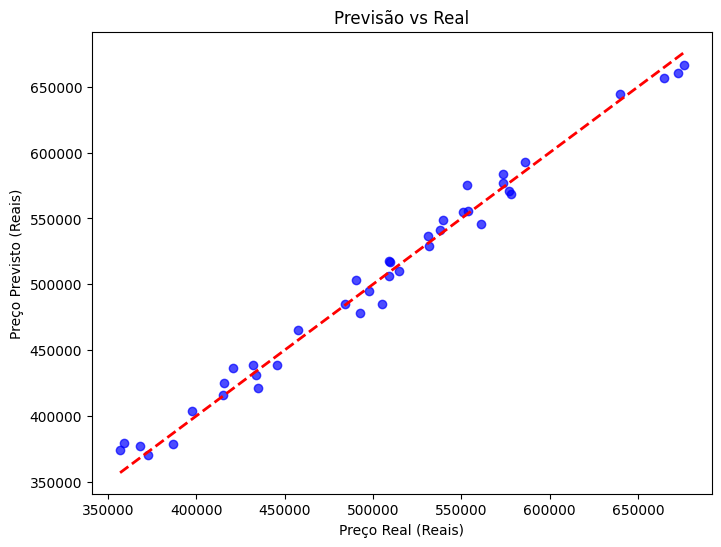

In [25]:
# Passo 6: Visualizando os resultados
# Gráfico de comparação entre valores reais e previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Preço Real (Reais)")
plt.ylabel("Preço Previsto (Reais)")
plt.title("Previsão vs Real")
plt.show()
